In [1]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as srn
from datetime import datetime
from statsmodels.graphics.api import qqplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
n=pd.read_csv("n.csv",index_col=[0],parse_dates=[0])  #load dataset
n['pub_date']=pd.to_datetime(n['pub_date'],infer_datetime_format=True)
n.head()

,Unnamed: 0.1,pub_date,actual,forecast,previous,rolling_std,z-score,1,5,6,7
1,1,2008-03-27,-36,-33,-85,65.728090,-0.045643,1473.280029,1495.359985,17600,0.052499
2,2,2008-04-03,-29,-34,-36,71.573018,0.069859,1497.920044,1453.439941,46100,-0.028434
3,3,2008-04-10,-14,-15,-29,76.372839,0.013094,1579.839966,1550.400024,43700,0.064580
4,4,2008-04-17,27,16,-14,86.497635,0.127171,1607.359985,1603.520020,22100,0.033688
5,5,2008-04-24,24,22,27,76.112905,0.026277,1662.079956,1673.599976,69200,0.042776


In [3]:
n.drop(["Unnamed: 0.1"],axis=1,inplace=True) #drop column 'unnamed'
n.head() #displays first 5 observations

,pub_date,actual,forecast,previous,rolling_std,z-score,1,5,6,7
1,2008-03-27,-36,-33,-85,65.728090,-0.045643,1473.280029,1495.359985,17600,0.052499
2,2008-04-03,-29,-34,-36,71.573018,0.069859,1497.920044,1453.439941,46100,-0.028434
3,2008-04-10,-14,-15,-29,76.372839,0.013094,1579.839966,1550.400024,43700,0.064580
4,2008-04-17,27,16,-14,86.497635,0.127171,1607.359985,1603.520020,22100,0.033688
5,2008-04-24,24,22,27,76.112905,0.026277,1662.079956,1673.599976,69200,0.042776


In [4]:
n.tail() #displays last 5 observations

,pub_date,actual,forecast,previous,rolling_std,z-score,1,5,6,7
521,2018-04-12,-19,-11,-29,74.141705,-0.107901,22.150000,22.190001,2432700,0.004517
522,2018-04-19,-36,-23,-19,48.603139,-0.267472,22.190001,22.090000,4147700,-0.004517
523,2018-04-26,-18,-11,-36,51.716594,-0.135353,22.910000,23.049999,2937700,0.042541
524,2018-05-03,62,47,-18,63.250045,0.237154,22.240000,22.309999,4191900,-0.032631
525,2018-05-10,89,81,62,62.000489,0.129031,22.530001,22.879999,5033700,0.025228


In [5]:
n.columns=["pub_date","actual","forecast","previous","rolling_std","z-score","open","close","volume","log difference"] #change column names

In [6]:
n.set_index(['pub_date'],inplace=True) #set date column as index column

In [7]:
n.head()

,actual,forecast,previous,rolling_std,z-score,open,close,volume,log difference
pub_date,,,,,,,,,
2008-03-27,-36,-33,-85,65.728090,-0.045643,1473.280029,1495.359985,17600,0.052499
2008-04-03,-29,-34,-36,71.573018,0.069859,1497.920044,1453.439941,46100,-0.028434
2008-04-10,-14,-15,-29,76.372839,0.013094,1579.839966,1550.400024,43700,0.064580
2008-04-17,27,16,-14,86.497635,0.127171,1607.359985,1603.520020,22100,0.033688
2008-04-24,24,22,27,76.112905,0.026277,1662.079956,1673.599976,69200,0.042776


In [8]:
n.tail()

,actual,forecast,previous,rolling_std,z-score,open,close,volume,log difference
pub_date,,,,,,,,,
2018-04-12,-19,-11,-29,74.141705,-0.107901,22.150000,22.190001,2432700,0.004517
2018-04-19,-36,-23,-19,48.603139,-0.267472,22.190001,22.090000,4147700,-0.004517
2018-04-26,-18,-11,-36,51.716594,-0.135353,22.910000,23.049999,2937700,0.042541
2018-05-03,62,47,-18,63.250045,0.237154,22.240000,22.309999,4191900,-0.032631
2018-05-10,89,81,62,62.000489,0.129031,22.530001,22.879999,5033700,0.025228


In [9]:
n.describe() #describes the data

,actual,forecast,previous,rolling_std,z-score,open,close,volume,log difference
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,5.250000e+02,525.000000
mean,1.401905,1.520000,0.855238,50.968739,0.000765,221.719752,220.167600,2.225681e+06,-0.007862
std,97.640681,95.435953,97.815637,30.860410,0.295626,364.513436,360.775456,2.334434e+06,0.056667
min,-359.000000,-318.000000,-359.000000,5.757735,-1.515589,20.680000,20.559999,1.760000e+04,-0.244881
25%,-63.000000,-60.000000,-64.000000,21.981225,-0.140338,38.919998,39.759998,9.725000e+05,-0.044585
50%,37.000000,38.000000,37.000000,45.554829,0.000000,83.879997,84.400002,1.721000e+06,-0.007305
75%,75.000000,75.000000,75.000000,74.984190,0.125251,200.160004,202.880005,2.675600e+06,0.027965
max,132.000000,119.000000,132.000000,125.394166,2.084153,2016.000000,2026.560059,2.830420e+07,0.215791


In [10]:
n.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525 entries, 2008-03-27 to 2018-05-10
Data columns (total 9 columns):
actual            525 non-null int64
forecast          525 non-null int64
previous          525 non-null int64
rolling_std       525 non-null float64
z-score           525 non-null float64
open              525 non-null float64
close             525 non-null float64
volume            525 non-null int64
log difference    525 non-null float64
dtypes: float64(5), int64(4)
memory usage: 41.0 KB


C:\Users\Chandra Sen\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


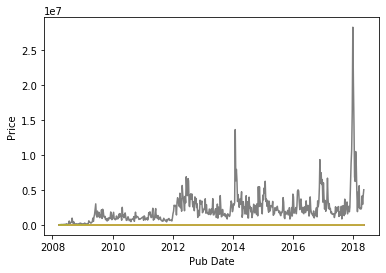

In [11]:
plt.xlabel("Pub Date")
plt.ylabel("Price")
plt.plot(n)

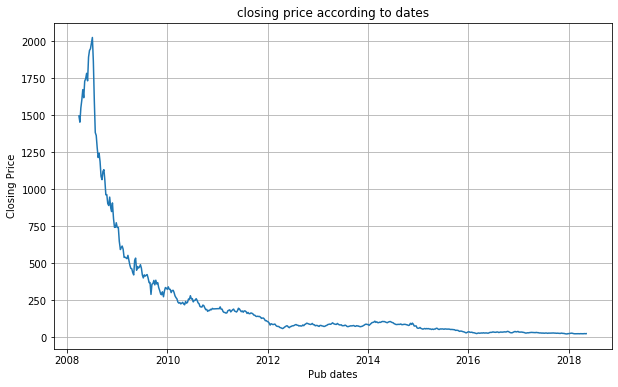

In [12]:
#plot closing price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Pub dates')
plt.ylabel('Closing Price')
plt.plot(n['close'])
plt.title('closing price according to dates')
plt.show()

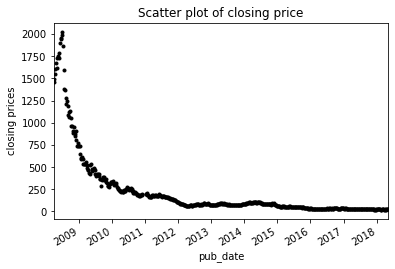

In [13]:
#scatter plot
df_close1 = n['close'] #dataframe containing column 'close'
df_close1.plot(style='k.')
plt.ylabel('closing prices')
plt.title('Scatter plot of closing price')
plt.show()

C:\Users\Chandra Sen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

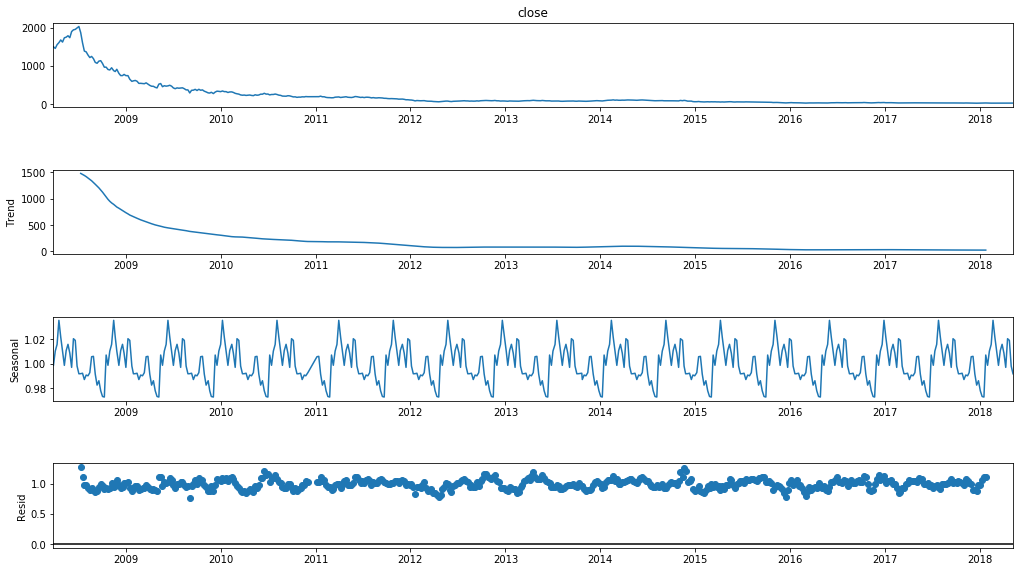

In [14]:
result = seasonal_decompose(df_close1, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [16]:
#rolling statistics

rolmean=n.rolling(window=52).mean() #rolling mean
rolstd= n.rolling(window=52).std() #rolling standard deviation
print(rolmean,rolstd)

               actual   forecast   previous  rolling_std   z-score       open  \
pub_date                                                                        
2008-03-27        NaN        NaN        NaN          NaN       NaN        NaN   
2008-04-03        NaN        NaN        NaN          NaN       NaN        NaN   
2008-04-10        NaN        NaN        NaN          NaN       NaN        NaN   
2008-04-17        NaN        NaN        NaN          NaN       NaN        NaN   
2008-04-24        NaN        NaN        NaN          NaN       NaN        NaN   
...               ...        ...        ...          ...       ...        ...   
2018-04-12 -13.788462 -12.711538 -13.230769    56.947127 -0.025043  25.398462   
2018-04-19 -15.519231 -14.096154 -13.788462    56.617204 -0.031649  25.244423   
2018-04-26 -17.288462 -15.692308 -15.519231    56.172176 -0.034766  25.112692   
2018-05-03 -17.384615 -15.961538 -17.288462    55.991119 -0.031793  24.968077   
2018-05-10 -16.538462 -15.40

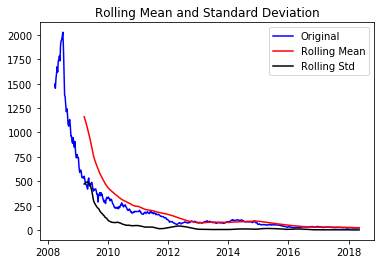

Results of dickey fuller test
Test Statistics                 -3.744531
p-value                          0.003529
No. of lags used                 1.000000
Number of observations used    523.000000
critical value (1%)             -3.442915
critical value (5%)             -2.867082
critical value (10%)            -2.569722
dtype: float64


In [17]:
#Test for stationarity

from statsmodels.tsa.stattools import adfuller
def test_stationarity(n):
   #Determing rolling statistics
    rolmean = n.rolling(52).mean()
    rolstd = n.rolling(52).std()
    #Plot rolling statistics:
    plt.plot(n, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(n,maxlag=1,autolag= None) #augmented dickey fuller test to check stationarity of data
    #output for adft will give us values without defining them.
    #hence we manually write what values does it explains using a for loop.
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close1)

In [ ]:
#The Null Hypothesis in ADF test states that the time-series data is non-stationary whereas, the Alternative Hypothesis states that the time-series data is stationary.
#The p-value given above is 0.003529 which is less than the level of significance:alpha=0.05.
#Therefore we have enough evidence to reject the Null Hypothesis and conclude that the given data is stationary.

In [18]:
df_log1=np.log(df_close1) #transforming into logarithmic value

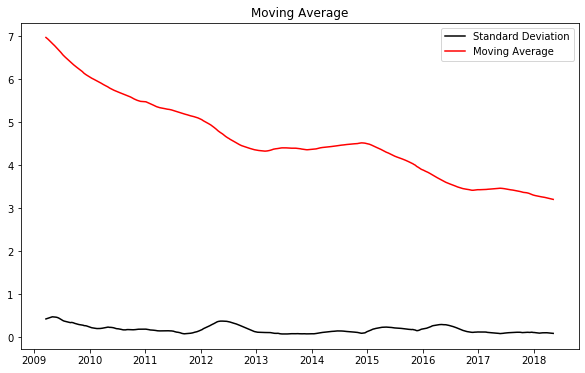

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log1 = np.log(df_close1)
#rolling statistics
moving_avg = df_log1.rolling(52).mean()
std_dev = df_log1.rolling(52).std()
#graph for moving average and standard deviation
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Moving Average")
plt.legend()
plt.show()

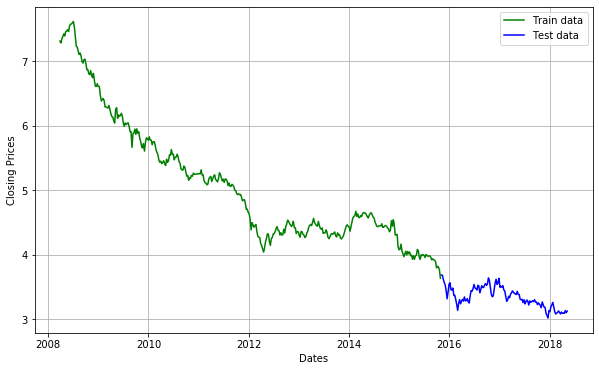

In [20]:
#splitting data into train set and test set
#the order sequence of the time series should be intact in order to use it for forecasting.

train_data = df_log1[:int(len(df_log1)*0.75)] #training set containing 75% of the data starting from day 1
test_data= df_log1[int(len(df_log1)*0.75):] #test set containing 25% of the data excluding the training set

#plot train set and test set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()



In [22]:
train_data.head()

pub_date
2008-03-27    7.310122
2008-04-03    7.281688
2008-04-10    7.346268
2008-04-17    7.379957
2008-04-24    7.422732
Name: close, dtype: float64

In [23]:
test_data.tail()

pub_date
2018-04-12    3.099642
2018-04-19    3.095125
2018-04-26    3.137666
2018-05-03    3.105035
2018-05-10    3.130263
Name: close, dtype: float64

In [24]:
#autoARIMA-Auto Rgressive Integrated Moving Average
#Returns best ARIMA model according to either AIC, AICc or BIC value.

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use ADF test to find optimal 'd' using constraints
                      max_p=3, max_q=3, # maximum p and q 
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'which is the number of differencing required to make the time series stationary
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1130.687, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1129.348, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1129.344, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1122.205, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1126.716, Time=0.44 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.651 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  393
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 567.343
Date:                Thu, 08 Oct 2020   AIC                          -1130.687
Time:                        21:32:19   BIC                          -1122.744
Sample:                             0   HQIC                         -1127.539
                                - 393                                  

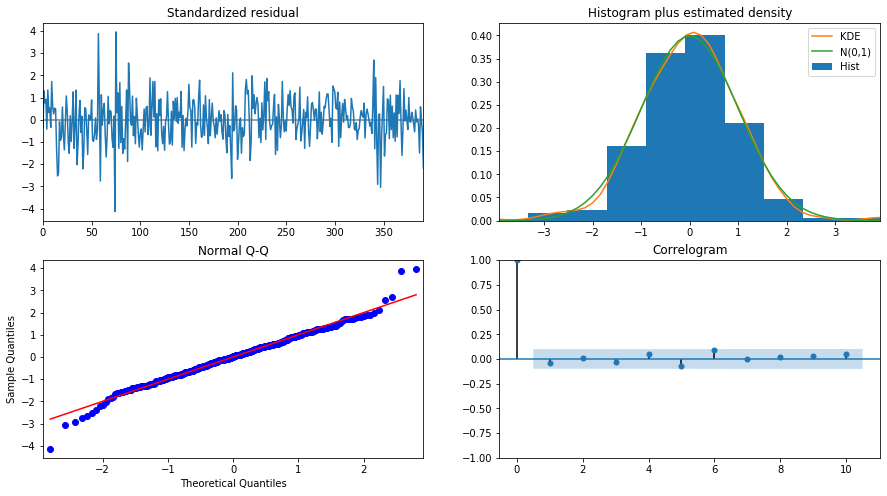

In [25]:
#plot autoARIMA 
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [26]:
#ARIMA model applied on train data
model = ARIMA(train_data, order=(0, 1, 0)) #values of p,q and d to be used in ARIMA function evaluated with the help of autoARIMA 
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  392
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 567.343
Method:                           css   S.D. of innovations              0.057
Date:                Thu, 08 Oct 2020   AIC                          -1130.687
Time:                        21:33:17   BIC                          -1122.744
Sample:                             1   HQIC                         -1127.539
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0094      0.003     -3.259      0.001      -0.015      -0.004


C:\Users\Chandra Sen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Chandra Sen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


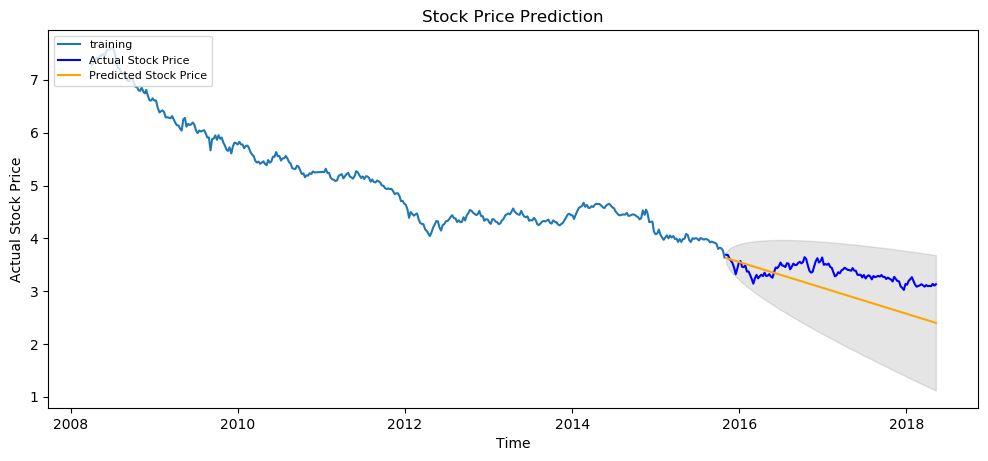

In [27]:
# Forecasting stock price
fc, se, conf = fitted.forecast(132, alpha=0.05)  # 95% confidence level
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

#plotting the actual and forecasted price based on train data and test data
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
fc_series.tail()

pub_date
2018-04-12    2.438391
2018-04-19    2.429022
2018-04-26    2.419653
2018-05-03    2.410284
2018-05-10    2.400916
dtype: float64

In [29]:
test_data.tail()

pub_date
2018-04-12    3.099642
2018-04-19    3.095125
2018-04-26    3.137666
2018-05-03    3.105035
2018-05-10    3.130263
Name: close, dtype: float64

In [30]:
# report performance based on test data and forecasted values

mse = mean_squared_error(test_data, fc) #Mean Squared Error
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc) #Mean Absolute Error
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc)) #Root Mean squared Error
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data)) ##Mean Absolute Percentage Error
print('MAPE: '+str(mape))

MSE: 0.1860555580632802
MAE: 0.38142604107742606
RMSE: 0.43134157933507894
MAPE: 0.11566221185515858


In [ ]:
#The value of MAPE is 0.115 which means the model is 88.5 % accurate in predicting the stock prices.